# What Is Random Forest Regression?

Random forest regression is a supervised learning algorithm that uses an ensemble learning method for regression.

Random forest is a bagging technique and not a boosting technique. The trees in random forests run in parallel, meaning there is no interaction between these trees while building the trees.

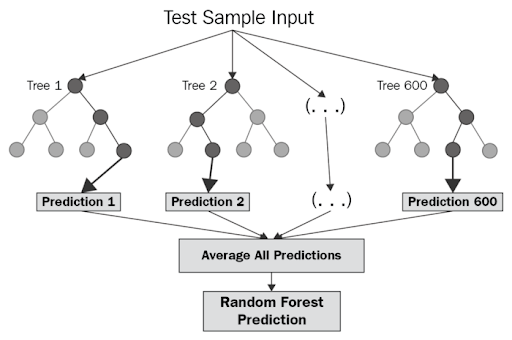

# ENSEMBLE LEARNING

An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model. A model comprised of many models is called an ensemble model.       

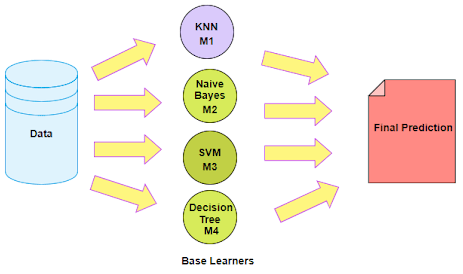

**WHAT ARE THE DIFFERENT KINDS OF ENSEMBLE LEARNING?**

1. Boosting
2. Bootstrap Aggregation (Bagging)

# BOOSTING

Boosting refers to a group of algorithms that utilize weighted averages to make weak learners into stronger learners. Boosting is all about teamwork. Each model that runs, dictates the features on which the next model will focus.

As the name suggests, boosting means one is learning from another, which in turn boosts the learning.

# BOOTSTRAPPING 

Bootstrap refers to random sampling with replacement. Bootstrap allows us to better understand the bias and the variance within the data set. Bootstrapping involves a random sampling of a small subset of data from the data set.

Bagging is a general procedure that can be used to reduce the variance for those algorithms that have high variance, typically decision trees. Bagging makes each model run independently and then aggregates the outputs at the end without preference to any model.

# How Does Random Forest Regression Work?

Random forest operates by constructing a multitude of decision trees at training time and outputting the clas s that’s the mode of the classes (classification) or mean prediction (regression) of the individual trees.

A random forest is a meta-estimator (i.e. it combines the result of multiple predictions), which aggregates many decision trees with some helpful modifications:

1. The number of features that can be split at each node is limited to some percentage of the total (which is known as the hyper-parameter). This limitation ensures that the ensemble model does not rely too heavily on any individual feature and makes fair use of all potentially predictive features.

2. Each tree draws a random sample from the original data set when generating its splits, adding a further element of randomness that prevents overfitting. 

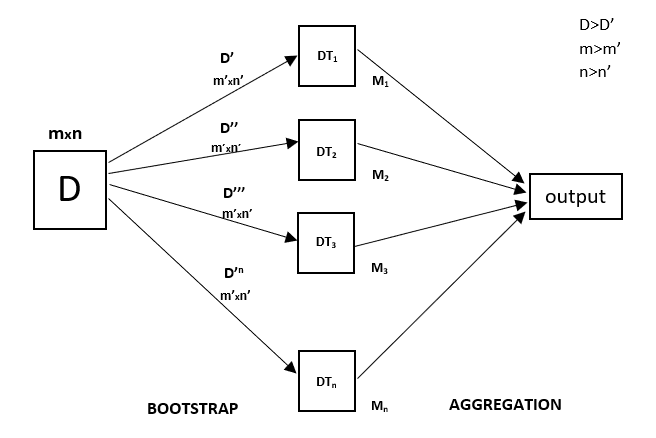

Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data, and hence the output doesn’t depend on one decision tree but on multiple decision trees.


In the case of a classification problem, the final output is taken by using the majority voting classifier. In the case of a regression problem, the final output is the mean of all the outputs. This part is called Aggregation. 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df.head()  # Displaying the first 5 elements

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# Assigning the input and output values
X = df.iloc[:, 1].values
y = df.iloc[:, 2].values

In [5]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X.reshape(-1,1), y.reshape(-1, 1))

C:\Users\hp\AppData\Local\Temp\ipykernel_20344\472059388.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X.reshape(-1,1), y.reshape(-1, 1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [6]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred

array([167000.])

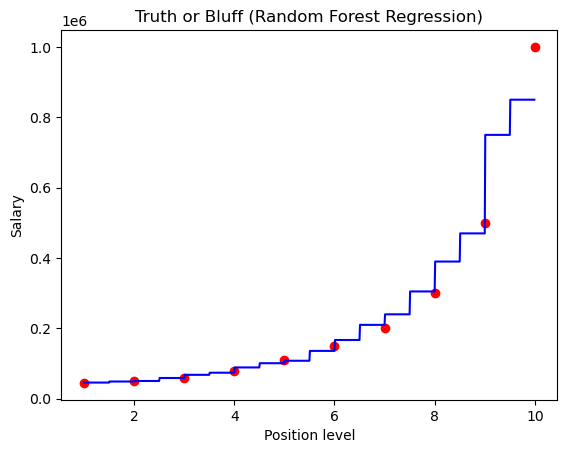

In [7]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()